# Introduction to Neural Networks Workshop

## Review of Tensorflow

First, let's do some common imports, as well as Tensorflow itself.

In [0]:
import numpy as np
import os
import tensorflow as tf

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Next, let's do a review of Tensorflow code itself. Tensorflow is usually not "interactive", in that the coding process is split into two parts. The first part consists of defining the graph to represent the desired mathematical computation. This static graph is stored, and is then ran and evaluated in a session after its definition.

Here, we define a few variables, named x and y, and define a function using these two variables, to give a clearer example of the Tensorflow process. Tensorflow variables are defined with tf.Variable( ). Here x is initialized to 3 and y is initialized to 4.

In [0]:
x = tf.Variable(3, name = "x")
y = tf.Variable(4, name = "y")
f = x*x*y + y + 2

In [5]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

Now we defined our easy graph. Let's start a Tensorflow session to evaluate our function graph.

In [6]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()
    print(result)

42


## Implement Logistic Regression in Tensorflow

For our example, we will be using the MNIST dataset. We will use Tensorflow library to help us download the MNIST dataset to be used in our logistic regression.

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Now we define some of the constants we will be using in our model. Learning rate defines how quickly we update our parameters as we train our model. The epochs and batch size are parameters that affect the way our model trains with our dataset.

In [0]:
learning_rate = 0.03
num_epochs = 100
batch_size = 100

Next we define some variables to be used in our model. The placeholders allow us to plug in values after defining our model. The variable starts off with values right away. In this case, we set the weights to random values, and we set the bias term to 0.

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [0]:
w = tf.Variable(tf.truncated_normal((784,10)))
b = tf.Variable(tf.zeros([10]))

We then matrix multiply our input X with our weights W and add our bias b to get the raw output, aka logits.

In [0]:
logits = tf.matmul(x,w) + b

We then apply the softmax function to the logits to get a probability for each output class. And then we use cross entropy to see how different this is from the expected output labels y. Tensorflow offers a function to do both of these steps in one go called softmax_cross_entropy_with_logits. We reduce this output array to its mean to represent the overall cost of our current model.

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = logits)
cost = tf.reduce_mean(cross_entropy)

Now we ask tensorflow to help us optimize our model using gradient descent by specifically minimizing the cost we had defined prior. We pass the learning rate into the optimizer, which is something we can mess around with to see what works best.

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Before we begin training, we want to initialize all the variables we have defined. In addition, because of the nature of jupyter notebook splitting up chunks of code, we initialize a saver object to make sure that the model we are working with is the same in between code chunks.

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

This is the part of our Tensorflow development where we train our defined model. Essentially, we train our model "num_epochs" amount of times, going through the training set in set batch sizes. In each step, we run the optimizer and we feed our new batch of training data X and labels y into our model through feed_dict, thus training our model at each step.

In [18]:
with tf.Session() as sess:
    init.run()
    for epoch in range(num_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        for iteration in range(mnist.train.num_examples // batch_size):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x:x_batch, y:y_batch})
            avg_cost += c/total_batch
        if (epoch+1) % 2 == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    saver.save(sess, "./saved_model.ckpt")


Epoch: 0002 cost= 1.601126363
Epoch: 0004 cost= 0.995943252
Epoch: 0006 cost= 0.819537786
Epoch: 0008 cost= 0.730201138
Epoch: 0010 cost= 0.671984343
Epoch: 0012 cost= 0.629845808
Epoch: 0014 cost= 0.597649844
Epoch: 0016 cost= 0.572512159
Epoch: 0018 cost= 0.552466067
Epoch: 0020 cost= 0.534409662
Epoch: 0022 cost= 0.518412761
Epoch: 0024 cost= 0.504408434
Epoch: 0026 cost= 0.492384765
Epoch: 0028 cost= 0.482020468
Epoch: 0030 cost= 0.471621908
Epoch: 0032 cost= 0.463144298
Epoch: 0034 cost= 0.455645045
Epoch: 0036 cost= 0.448218664
Epoch: 0038 cost= 0.440721898
Epoch: 0040 cost= 0.434496840
Epoch: 0042 cost= 0.428364906
Epoch: 0044 cost= 0.422250610
Epoch: 0046 cost= 0.417640193
Epoch: 0048 cost= 0.412215429
Epoch: 0050 cost= 0.407730887
Epoch: 0052 cost= 0.403466693
Epoch: 0054 cost= 0.399573379
Epoch: 0056 cost= 0.395098864
Epoch: 0058 cost= 0.392100683
Epoch: 0060 cost= 0.388197445
Epoch: 0062 cost= 0.385083042
Epoch: 0064 cost= 0.380959643
Epoch: 0066 cost= 0.378086666
Epoch: 006

In [0]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

The above code is just a function to help plot our MNIST images. Below we take in new test images in our model and predict the image. We then plot them to see visually how our model did.

INFO:tensorflow:Restoring parameters from ./saved_model.ckpt
0.9079


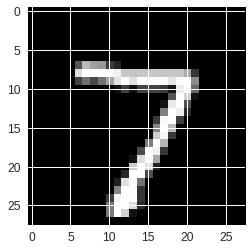

Predition:  7
Actual label:  7


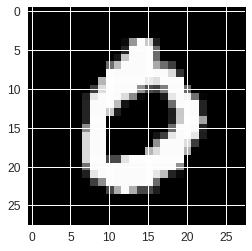

Predition:  0
Actual label:  0


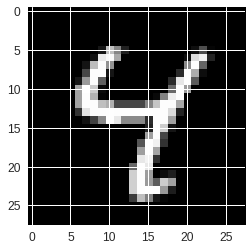

Predition:  4
Actual label:  4


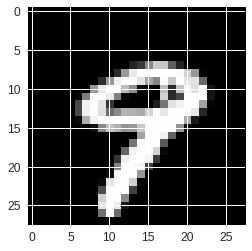

Predition:  9
Actual label:  9


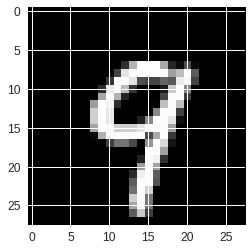

Predition:  9
Actual label:  9


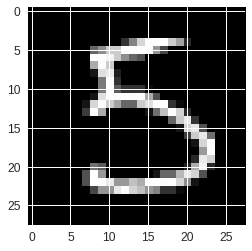

Predition:  5
Actual label:  5


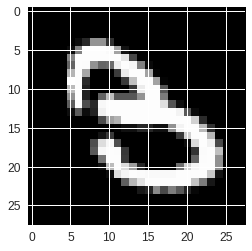

Predition:  3
Actual label:  3


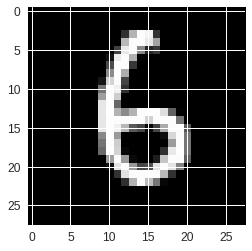

Predition:  6
Actual label:  6


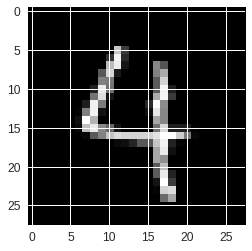

Predition:  4
Actual label:  4


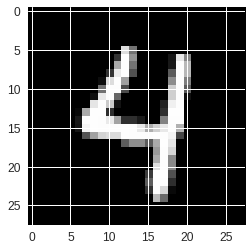

Predition:  4
Actual label:  4


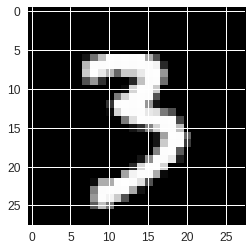

Predition:  3
Actual label:  3


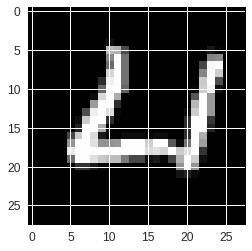

Predition:  6
Actual label:  4


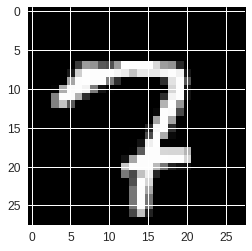

Predition:  7
Actual label:  7


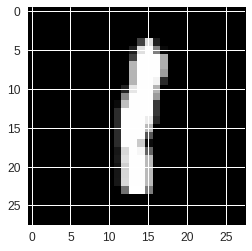

Predition:  1
Actual label:  1


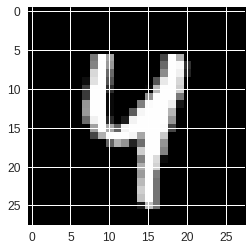

Predition:  4
Actual label:  4


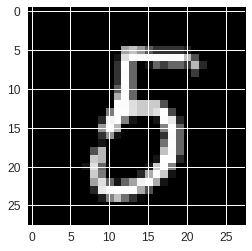

Predition:  5
Actual label:  5


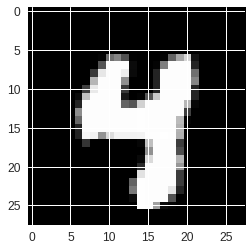

Predition:  4
Actual label:  4


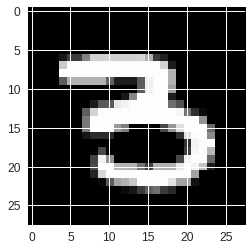

Predition:  3
Actual label:  3


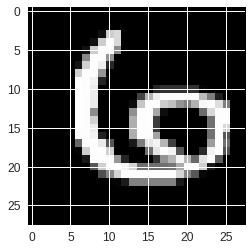

Predition:  6
Actual label:  6


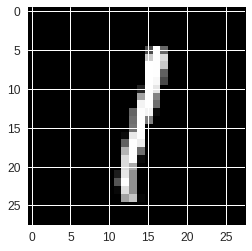

Predition:  1
Actual label:  1


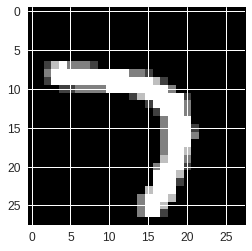

Predition:  7
Actual label:  7


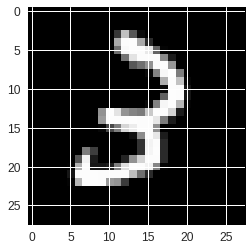

Predition:  2
Actual label:  3


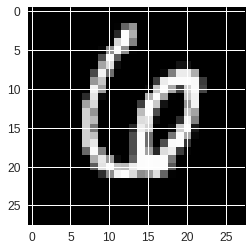

Predition:  3
Actual label:  6


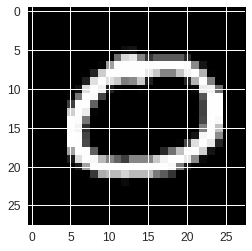

Predition:  0
Actual label:  0


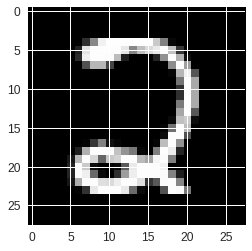

Predition:  2
Actual label:  2


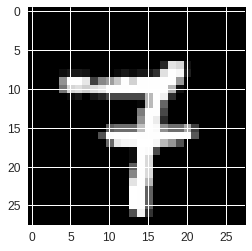

Predition:  7
Actual label:  7


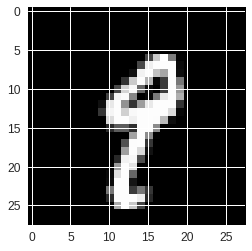

Predition:  9
Actual label:  9


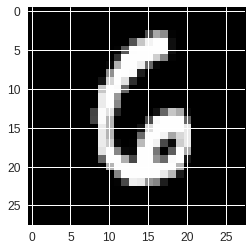

Predition:  6
Actual label:  6


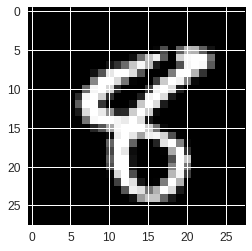

Predition:  8
Actual label:  8


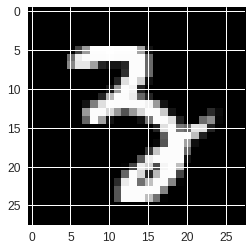

Predition:  3
Actual label:  3


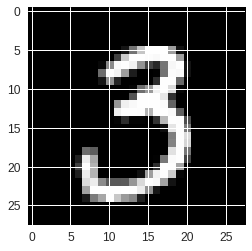

Predition:  3
Actual label:  3


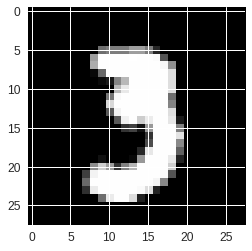

Predition:  3
Actual label:  3


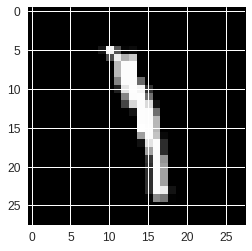

Predition:  1
Actual label:  1


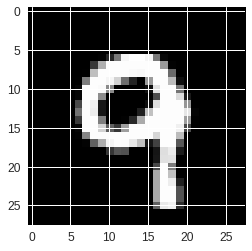

Predition:  9
Actual label:  9


In [21]:
with tf.Session() as sess:
    saver.restore(sess, "./saved_model.ckpt")
    X_new_scaled = mnist.test.images #which is your new test images 
    z = logits.eval(feed_dict = {x:X_new_scaled})
    y_pred = np.argmax(z, axis=1)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    for i in range(100):
        if i%3 == 0:
            gen_image(mnist.test.images[i]).show()
            print("Predition: ", y_pred[i])
            print("Actual label: ", np.argmax(mnist.test.labels[i]))
    

In [23]:
size(correct_prediction)


NameError: ignored